In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pylab
from scipy.stats import norm
import scipy as sci
import math as math
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

%matplotlib inline

## exercize 1

**2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [2]:
def f(x):  #defining the function
    
    x_square=x[0]**2
    x_4=x[0]**4
    y_square=x[1]**2
    
    return (4-2.1*x_square+(x_4/3))*x_square+x[0]*x[1]+(4*y_square-4)*y_square


bnds = ((-2, 2), (-1, 1)) #defining the boundaries

I wanted to analyzes all the possible starting points contained in the boundaries with a difference of 0.5 in at least one of the coordinates. In order to achieve that I used a for loop but it was not possible to make steps of length 0.5 to updated the variables. So I multiplied the boundaries for 10 and uptated the varibles with a step of length 5. Once updated I rescaled the variable back to the original range of values. 

In [3]:
minima=[]
points=[]


for y in range(-10,15,5): #updating the y coordinate with a step of length of 5
    y=y/10  #scaling the varaible to the original dimension
    
    for x in range(-20,25,5): #updating the coordinate x
        x=x/10

        x0=[x,y] #defining the starting point
        
        sol=optimize.minimize(f, x0, bounds=bnds) #calculating the minima 
        
        m=np.around(sol.x, decimals=5) #rounding the result of the minima
        
        minima.append(m) 
        points.append([m,x0])


minima=np.unique(minima, axis=0) #finding the unique values in the minima arrays
points=np.asarray(points)

print(f'there are {len(minima)} minima')
print('\n')

for i in minima:
    
    print(f'MINIMUM: {i}.') #printing the minima
    
    p=points[points[:,0]==i] #finding the starting points which lead to the same minima
    print(f'POSSIBLE STARTING POINTS:{p[1::2]}')
    
    print(f'VALUE OF f={f(i)}') #calculating the values of the function in the minima
    print('\n')
    


there are 7 minima


MINIMUM: [-1.70361  0.79608].
POSSIBLE STARTING POINTS:[[-1.5 -1. ]
 [-1.5  0. ]
 [-1.5  0.5]
 [ 1.   0.5]
 [-1.5  1. ]]
VALUE OF f=-0.21546382412620246


MINIMUM: [-1.6071  -0.56865].
POSSIBLE STARTING POINTS:[[-1.5 -0.5]]
VALUE OF f=2.1042503104348094


MINIMUM: [-0.08984  0.71266].
POSSIBLE STARTING POINTS:[[ 1.  -1. ]
 [-2.   0. ]
 [-1.   0. ]
 [-0.5  0. ]
 [-2.   0.5]
 [-1.   0.5]
 [-0.5  0.5]
 [ 0.   0.5]
 [ 0.5  0.5]
 [ 2.   0.5]
 [-2.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [ 2.   1. ]]
VALUE OF f=-1.0316284533608835


MINIMUM: [0. 0.].
POSSIBLE STARTING POINTS:[[0. 0.]]
VALUE OF f=0.0


MINIMUM: [ 0.08984 -0.71266].
POSSIBLE STARTING POINTS:[[-2.  -1. ]
 [-1.  -1. ]
 [-0.5 -1. ]
 [ 0.  -1. ]
 [ 0.5 -1. ]
 [ 2.  -1. ]
 [-2.  -0.5]
 [-0.5 -0.5]
 [ 0.  -0.5]
 [ 0.5 -0.5]
 [ 1.  -0.5]
 [ 2.  -0.5]
 [ 0.5  0. ]
 [ 1.   0. ]
 [ 2.   0. ]
 [-1.   1. ]]
VALUE OF f=-1.0316284533608835


MINIMUM: [1.6071  0.56865].
POSSIBLE STARTING POINTS:[[1.5 

(4000,)
(1, 4000)
(4000, 1)


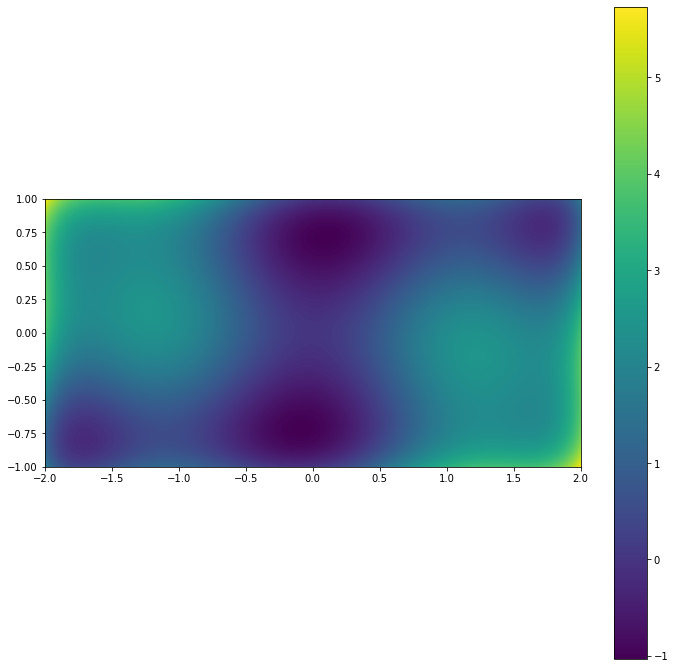

In [4]:
# plotting the results
x = np.arange(-2, 2, 0.001)
y = np.arange(-1, 1, 0.0005)
xx, yy = np.meshgrid(x, y, sparse=True)
print(f([x,y]).shape)
print(xx.shape)
print(yy.shape)
plt.figure(figsize=(12, 12))
pylab.imshow(f([xx,yy]),extent=[-2,2,-1,1])
plt.colorbar()

In [5]:
x = np.arange(-2, 2, 0.05)
y = np.arange(-1, 1, 0.025)

In [6]:
xx, yy = np.meshgrid(x, y, sparse=True)

<IPython.core.display.Javascript object>


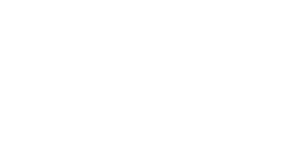

In [7]:
# printing the function in 3 dimensions
%matplotlib notebook
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, f([xx,yy]), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('f(x,y)');


In order to analize what happens to the function with initial guess [0,0] I zoom in the region around zero the 3D plot.

In [8]:
x = np.arange(-0.5, 0.5, 0.05) 
y = np.arange(-0.5, 0.5, 0.05)

xx, yy = np.meshgrid(x, y, sparse=True)

<IPython.core.display.Javascript object>


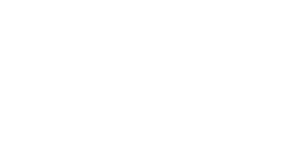

In [9]:
%matplotlib notebook
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, f([xx,yy]), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('f(x,y)');

Using the initial guess[0,0] <code>scipy.optimize.minimize()</code> identifies the point [0,0] as a minima, but the 3d plot shows that the point [0,0] is an inflection point.

## exercize 2

**Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [10]:
t=np.arange(1, 13, 1) #initializing the needed arrays
print(t)
ma=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mi=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

[ 1  2  3  4  5  6  7  8  9 10 11 12]


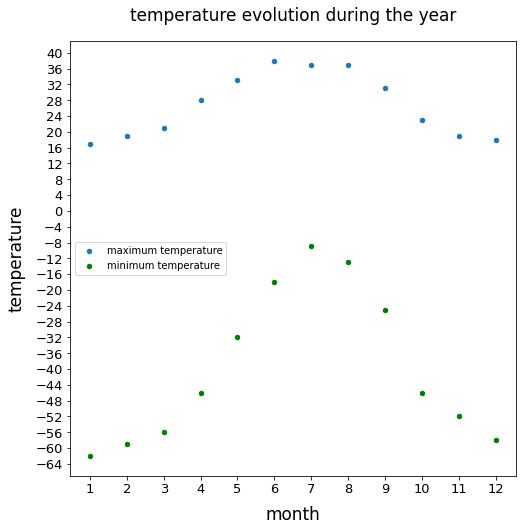

In [11]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the points

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('month', fontsize=17, labelpad=10)
ax.set_ylabel('temperature', fontsize=17, labelpad=10)
ax.set_title('temperature evolution during the year', fontsize=17, pad=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(4)) 

ax.scatter(t, ma, s=20)
ax.scatter(t, mi, s=20, color='g')
ax.legend(['maximum temperature','minimum temperature'],loc='center left')

Analyzing the points in the scatter plot and considering the possible periodicity of the values of the highest temperature it is possible to hypotize that a good fitting function is based on cosine or sine functions.

In [12]:
def f(x, A, nu, b, c): #defining the fitting function
    return A * np.cos(nu * x+b)+c # cosine function with amplitude A, angular frequency nu and shift on y axis b

#fitting the data with initial guesses of the parameters
popt, pcov = optimize.curve_fit(f, t, ma, p0=[-10, 0.5, -1, 27], full_output=False) 
print("parameters:", popt) #printing the parameters
print('\n')
print("covariance matrix:\n", pcov) #printing the covariance matrix
print('\n')
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0]))) #printing the parameters with the associated errors
print("f = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("b = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("c = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])))


parameters: [-10.58169954   0.59227424  -0.84013367  27.94963533]


covariance matrix:
 [[ 0.16816441  0.00085885 -0.00522752 -0.00655279]
 [ 0.00085885  0.00044872 -0.00296267  0.00640272]
 [-0.00522752 -0.00296267  0.02135828 -0.04203833]
 [-0.00655279  0.00640272 -0.04203833  0.18339711]]


A = -10.58 +- 0.41
f = 0.59 +- 0.02
b = -0.84 +- 0.15
c = 27.95 +- 0.43


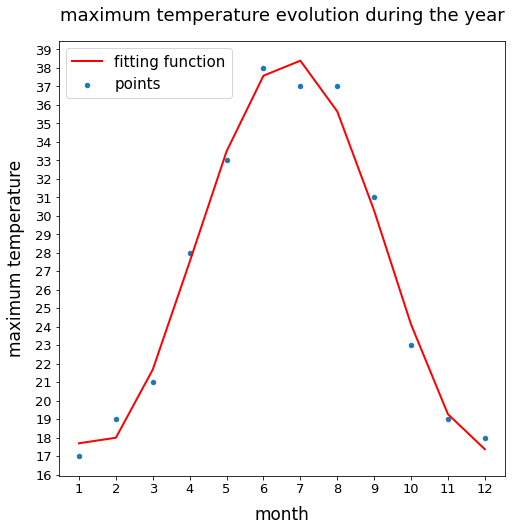

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the points with the function found

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('month', fontsize=17, labelpad=10)
ax.set_ylabel('maximum temperature', fontsize=17, labelpad=10)
ax.set_title('maximum temperature evolution during the year', fontsize=18, pad=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(1)) 

ax.scatter(t, ma, label='data', s=20)
ax.plot(t, f(t, popt[0], popt[1], popt[2], popt[3]), linestyle="-", linewidth=2, color='r')
ax.legend(['fitting function','points'],loc='best',prop={"size":15})


One possible way to see the if the function fits the points well is to see the difference between the predicted and the true values.

DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.6913147811822427
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 1.010634880975637
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.6804166672758356
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.4929003146516031
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.48453403294854525
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.4235144028246367
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 1.3890166316841928
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 1.3546644289432876
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.7199129452702984
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 1.1209619309551861
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.26608791696855505
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM

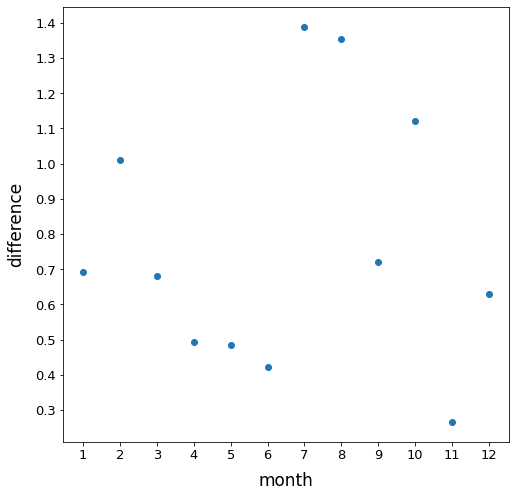

In [14]:
for i in range(0,12): #calculating the differences
    print(f'DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: {abs(f(t[i], popt[0], popt[1], popt[2], popt[3])-ma[i])}')
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the differences

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('month', fontsize=17, labelpad=10)
ax.set_ylabel('difference', fontsize=17, labelpad=10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
    
ax.scatter(t,abs(f(t, popt[0], popt[1], popt[2], popt[3])-ma))

The function used seems to fit the data quite weel. Indeed the errors on the parameters are reasonable, qualitatively watching the plot the function seems to follow the data and the differences between the real and the predicted values are limitated in most of cases if compared to the values of the data.

For the reasons explained previously, it is possible to use a cosine or sine function to fit the data of the  temperatures minima.

In [15]:
def f(x, A, nu, b, c):
    return A * np.cos(nu * x+b)+c # # cosine function with amplitude A, angular frequency nu and shift on y axis b

#fitting the points
popt, pcov = optimize.curve_fit(f, t, mi, p0=[-26.5, 0.5,-1,0.5], full_output=False) 
print("parameters:", popt)  #printing the parameters 
print('\n')
print("covariance matrix:\n", pcov) #printing the covariance matrix
print('\n')
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))  #printing the parameters with the associated errors
print("f = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("b = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("c = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])))


parameters: [-25.14961999   0.60132088  -1.14762614 -36.71256637]


covariance matrix:
 [[ 1.72807264e+00  2.48097730e-04  3.66507161e-03 -1.89192666e-01]
 [ 2.48097730e-04  5.30714204e-04 -3.55962504e-03  1.60002365e-02]
 [ 3.66507161e-03 -3.55962504e-03  2.70519388e-02 -1.04188186e-01]
 [-1.89192666e-01  1.60002365e-02 -1.04188186e-01  1.41859662e+00]]


A = -25.15 +- 1.31
f = 0.60 +- 0.02
b = -1.15 +- 0.16
c = -36.71 +- 1.19


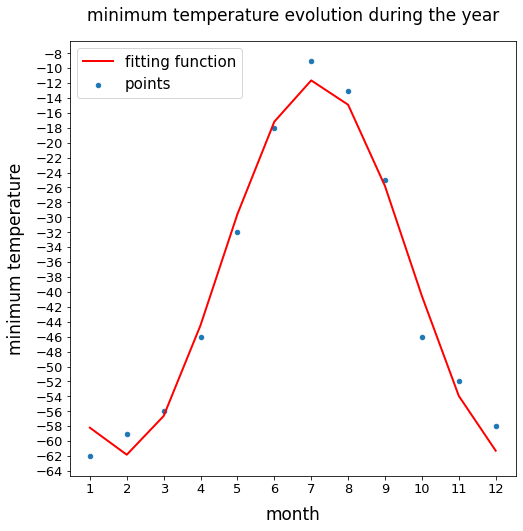

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the points with the function found

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('month', fontsize=17, labelpad=10)
ax.set_ylabel('minimum temperature', fontsize=17, labelpad=10)
ax.set_title('minimum temperature evolution during the year', fontsize=17, pad=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(2)) 

ax.scatter(t, mi, label='data', s=20)
ax.plot(t, f(t, popt[0], popt[1], popt[2],popt[3]), linestyle="-", linewidth=2, color='r')
ax.legend(['fitting function','points'],loc='best',prop={"size":15})



DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 3.79834352270548
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 2.824135541906273
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.6369271335748081
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 1.5401826312875428
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 2.4351974217576426
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.8226204029834534
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 2.643327230288957
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 1.9041120380486731
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.815779419929413
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 5.449722100960052
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 1.9384232718851138
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPER

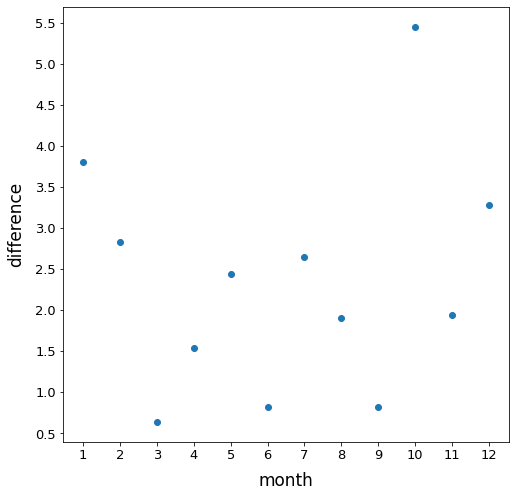

In [17]:
for i in range(0,12): #calculating the differences
    print(f'DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: {abs(f(t[i], popt[0], popt[1], popt[2],popt[3])-mi[i])}')
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the differences

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('month', fontsize=17, labelpad=10)
ax.set_ylabel('difference', fontsize=17, labelpad=10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
    
ax.scatter(t,abs(f(t, popt[0], popt[1], popt[2],popt[3])-mi))

Surely the function used it is able to grasp the general behaviour of the data but it leads to worse results than the previous one. Indeed both the errors on the parameters and the differences between the real and predicted values are larger.

The first time offset is $b=-0.84 +- 0.15$ while the second is $b= -1.15 +- 0.16$. So the minima of the first one the maxima of the second one coincides.

Analyzing the positions of the points it is possible that the gaussian could be another fitting function.

In [18]:
def f(x, m, s, A,c): #defining the fitting function
    return A * np.exp((-1/2)*(((x-m)/s)**2))+c

popt, pcov = optimize.curve_fit(f, t, ma, p0=[7, 2,23,16], full_output=False) 
print("parameters:", popt)  #printing the parameters 
print('\n')
print("covariance matrix:\n", pcov) #printing the covariance matrix
print('\n')
print("m = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))  #printing the parameters with the associated errors
print("s = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("A = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("c = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])))


parameters: [ 6.73581527  2.29442997 23.09206535 15.7793553 ]


covariance matrix:
 [[ 6.31515334e-03 -2.12244646e-04 -1.60433187e-03  1.91658935e-03]
 [-2.12244646e-04  2.75447055e-02  1.01484305e-01 -1.70939885e-01]
 [-1.60433187e-03  1.01484305e-01  1.32869968e+00 -1.08344128e+00]
 [ 1.91658935e-03 -1.70939885e-01 -1.08344128e+00  1.38437419e+00]]


m = 6.74 +- 0.08
s = 2.29 +- 0.17
A = 23.09 +- 1.15
c = 15.78 +- 1.18


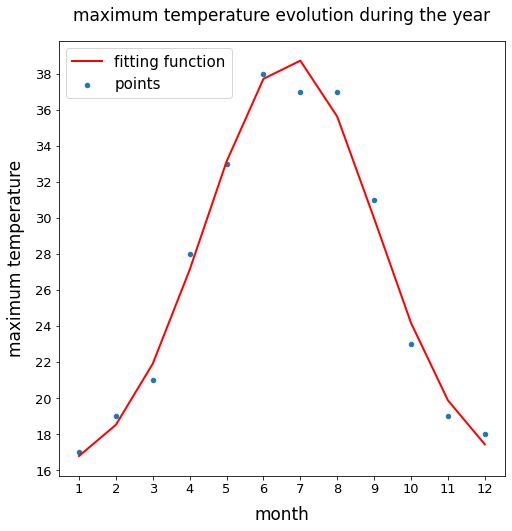

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the points with the function found

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('month', fontsize=17, labelpad=10)
ax.set_ylabel('maximum temperature', fontsize=17, labelpad=10)
ax.set_title('maximum temperature evolution during the year', fontsize=17, pad=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(2)) 

ax.scatter(t, ma, label='data', s=20)
ax.plot(t, f(t, popt[0], popt[1], popt[2],popt[3]), linestyle="-", linewidth=2, color='r')
ax.legend(['fitting function','points'],loc='best',prop={"size":15})

DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.20576307146761152
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.47685384961032184
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.9140121207630187
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.8775071325822239
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.12457409848591539
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.2860293433788712
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 1.7188538795064687
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 1.3806534882219452
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 1.0299816746953425
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 1.1733280751294153
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: 0.8855173262503442
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIM

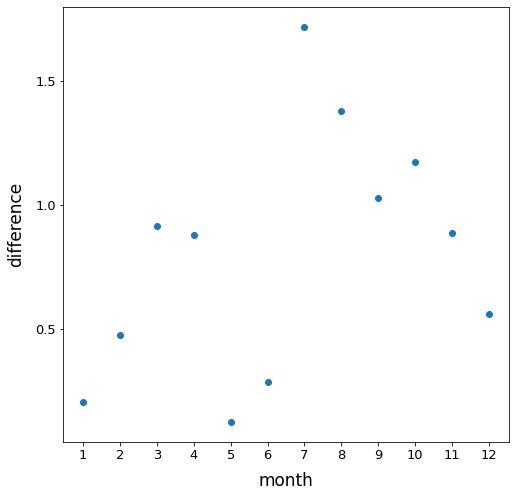

In [20]:
for i in range(0,12): #calculating the differences
    print(f'DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MAXIMUM TEMPERATURE: {abs(f(t[i], popt[0], popt[1], popt[2],popt[3])-ma[i])}')
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the differences

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('month', fontsize=17, labelpad=10)
ax.set_ylabel('difference', fontsize=17, labelpad=10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
    
ax.scatter(t,abs(f(t, popt[0], popt[1], popt[2],popt[3])-ma))

In [21]:
def f(x, m, s, A,c): #defining the fitting function
    return A * np.exp((-1/2)*(((x-m)/s)**2))+c

popt, pcov = optimize.curve_fit(f, t, mi, p0=[7, 2,56,-60], full_output=False) 
print("parameters:", popt)  #printing the parameters 
print('\n')
print("covariance matrix:\n", pcov) #printing the covariance matrix
print('\n')
print("m = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))  #printing the parameters with the associated errors
print("s = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("A = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("c = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])))

parameters: [  7.16452575   1.97590071  52.64929437 -61.32094347]


covariance matrix:
 [[ 2.22851172e-03 -4.92586670e-05 -8.73562968e-04  1.09108842e-03]
 [-4.92586670e-05  5.77340648e-03  2.27204382e-02 -7.06541586e-02]
 [-8.73562968e-04  2.27204382e-02  1.96937901e+00 -1.05133468e+00]
 [ 1.09108842e-03 -7.06541586e-02 -1.05133468e+00  1.41334606e+00]]


m = 7.16 +- 0.05
s = 1.98 +- 0.08
A = 52.65 +- 1.40
c = -61.32 +- 1.19


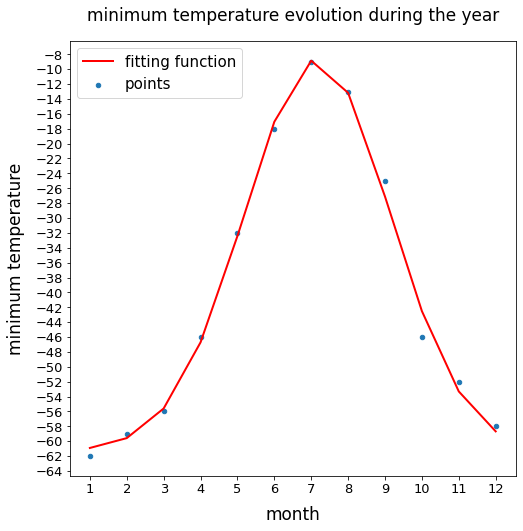

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the points with the function found

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('month', fontsize=17, labelpad=10)
ax.set_ylabel('minimum temperature', fontsize=17, labelpad=10)
ax.set_title('minimum temperature evolution during the year', fontsize=17, pad=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(2)) 

ax.scatter(t, mi, label='data', s=20)
ax.plot(t, f(t, popt[0], popt[1], popt[2],popt[3]), linestyle="-", linewidth=2, color='r')
ax.legend(['fitting function','points'],loc='best',prop={"size":15})

DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 1.0843685908968936
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.591519970330701
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.3908822942945136
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.7190117102907934
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.42695823771175867
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.9344643455809418
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.1461512479571354
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 0.1739187731963483
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 2.121923462648823
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 3.481731411349543
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: 1.319149209876386
DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEM

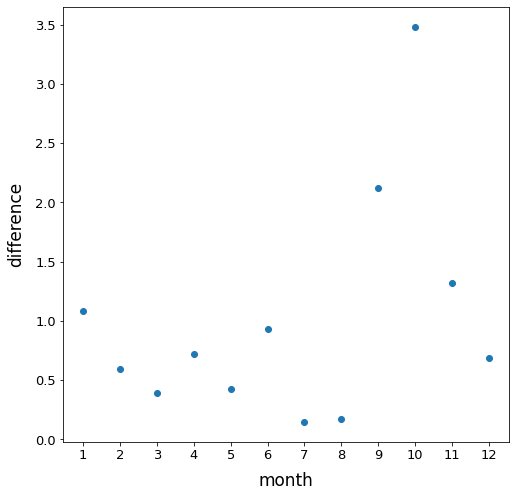

In [23]:
for i in range(0,12): #calculating the differences
    print(f'DIFFERENCE BETWEEN THE REAL AND THE PREDICTED MINIMUM TEMPERATURE: {abs(f(t[i], popt[0], popt[1], popt[2],popt[3])-mi[i])}')
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the differences

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('month', fontsize=17, labelpad=10)
ax.set_ylabel('difference', fontsize=17, labelpad=10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
    
ax.scatter(t,abs(f(t, popt[0], popt[1], popt[2],popt[3])-mi))

The gaussians seems to reflect better the behaviour of the points, expecially in the case of minima temperature. Indeed in this case the differences with the real values are generally smaller. But we expect that the evolution of the tamperature to be a periodic phenomena thus the cosine and sine function could be a better choice physically speaking.

## exercize 3

**Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [24]:
import numpy as np

file=np.load('residuals_261.pkl',allow_pickle=True) #loading the file

print(file) #inspecting the file
print(type(file))
print(file.shape)

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}
<class 'numpy.ndarray'>
()


In [25]:
res=file.item()['residuals'] #putting the elements of the two categories in two numpy arrays and reshaping them in order to create a dataframe
res=np.reshape(res,(1,res.shape[0]))

dis=file.item()['distances']
dis=np.reshape(dis,(1,res.shape[1]))

import pandas as pd
m = np.vstack([dis,res]) #generating a 2D array with the two previous array
print(m)

m = np.transpose(m) #reashaping the array in order to definy a dataframe
data=pd.DataFrame(m, columns=['distances','residuals']) #definying the dataframe
data

[[16.          6.3         3.4        ...  1.7        19.1
   2.6       ]
 [ 1.1        -1.95       -7.2        ...  0.08333333  0.16666667
   0.08333333]]


,distances,residuals
0,16.0,1.100000
1,6.3,-1.950000
2,3.4,-7.200000
3,8.4,-4.150000
4,1.7,-6.590000
...,...,...
11126,14.4,-0.760000
11127,7.5,0.380000
11128,1.7,0.083333
11129,19.1,0.166667


I plot the histogram of the considered array in order to better understand the possible fitting distribution .

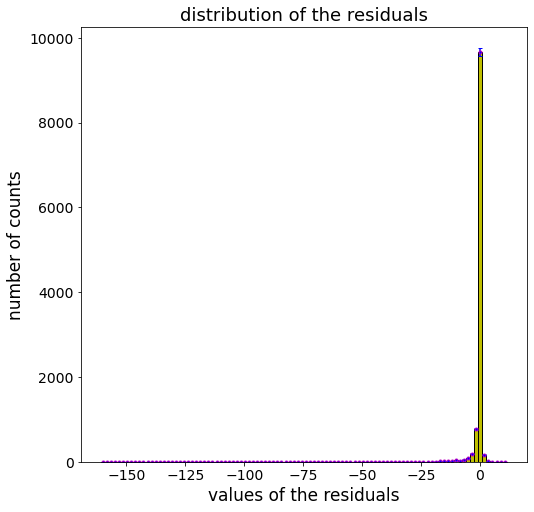

In [26]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #generating the subplot with a figure object and an axes object

bin_values, edges, _ = ax.hist(data['residuals'], bins=100,label='x', color='y', edgecolor='black') #generating a histogram and defining the bins values(the number of elements in a bin) and the bins edges

ax.set_xlabel('values of the residuals', fontsize=17) #setting the label of the axis
ax.set_ylabel('number of counts', fontsize=17)
ax.set_title('distribution of the residuals', fontsize=18) #setting the title

bin_centers= 0.5 * (edges[:-1] + edges[1:]) #defining the array of the centers of the bins on the x axis
bin_w=(edges[:-1] - edges[1:])

ax.errorbar(bin_centers, bin_values, yerr=((bin_values)**(1/2)), fmt='b.', markeredgecolor='m',  capsize=2) #adding the errorbars

ax.tick_params(axis='x', labelsize=14) #setting the dimension of axis ticks
ax.tick_params(axis='y', labelsize=14)


In order to better analyze the dataset I plot the data trying to fit them with a linear function. The means of the data in each bin (of the previous histogram) with the associated errors are presentend in the final plot.

In [27]:
reg=sci.stats.linregress(data['distances'], data['residuals']) #doing a linear regression on the data
print(reg)

reg=[round(reg[i], 4) for i in range(len(reg))] #putting the rounded results of the regression in an array 
print(reg)

LinregressResult(slope=0.040092306964069714, intercept=-1.0082379394879784, rvalue=0.056597511872424046, pvalue=2.2958576253921742e-09, stderr=0.006704076121902537, intercept_stderr=0.07644622095409256)
[0.0401, -1.0082, 0.0566, 0.0, 0.0067]


/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


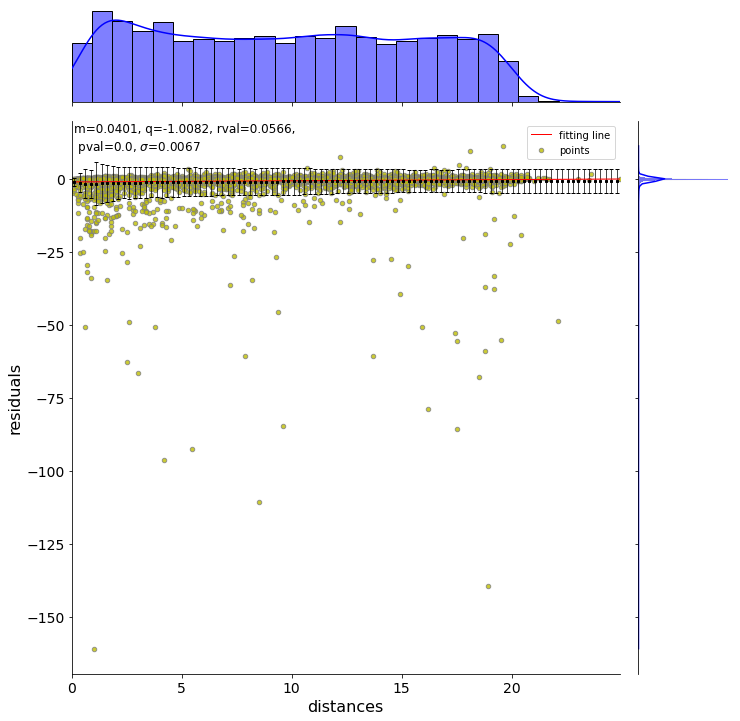

In [28]:
import seaborn as sns

a=data['distances'] #generating arrays with the columns of the dataframe
b=data['residuals']

def customJoint(a,b): #defining a function which plots the required points(means of the data in each bin of the histogram). It will be added to the joint plot 
    
    _ , edges=np.histogram(a, bins=100) #taking the edges of the bins of the histogram of distances values
    x= 0.5 * (edges[:-1] + edges[1:]) #calculating the centers
    
    y=[]
    erry=[]
    for i in range(len(edges)-1):
        ghost_df=data[edges[i]<a] #diving the dataset into the the intervals defined by the bins
        ghost_df=data[a<edges[i+1]]
        y.append(np.mean(ghost_df['residuals'])) #calculating the mean of the corresponding residuals values ant appending them in a list
        erry.append(np.std(ghost_df['residuals'])) #calculating the standard deviation of the corresponding residuals values ant appending them in a list

    
    y=np.asarray(y) #converting the lists into numpy arrays
    erry=np.asarray(erry)
    
    plt.errorbar(x, y, erry, fmt='s', color='black',markersize=2, linewidth=0.7, capsize=2) #defining an obljects that plots the means at the bin centers with the corresponding errorbar
    
    


#plotting the final result: the data, the fitting linear function and the means with the errors 
g=sns.jointplot("distances", "residuals", data=data, kind="reg", color='y',height=10, scatter_kws={'s':20, 'ec':'gray'} ,joint_kws={'line_kws': {'linewidth': 1, 'color':'r'}}, marginal_kws={'color': 'b'}).plot_joint(customJoint)
g.set_axis_labels("distances", "residuals", fontsize=16)
g.ax_joint.tick_params(axis='x', labelsize=14)
g.ax_joint.tick_params(axis='y', labelsize=14)
g.ax_joint.text(0.1, 10, 'm='+str(reg[0])+', q='+str(reg[1])+', rval='+str(reg[2])+',\n pval='+str(reg[3])+', $\sigma$='+str(reg[4])+'', fontsize=12)
g.ax_joint.legend(['fitting line','points']) #set of the legend


The plots shows the presence of some points that are distant from the most common values of the dataset. In order to better fit the dataset it is possible to eliminate that data. A possibility is to keep the points within a certain interval. 

I build the interval as follow. Firstly I choose as center of it the mean of the means calculated before. Then the mean of the errors previously calculated is set as the half of the range of the interval. So the final result is an interval with the mean of the means as center and twice the value of the mean of the errrors as the lenght of the interval.

In [29]:
_ , edges=np.histogram(a, bins=100) #taking the edges of the bins of the histogram of distances values
x= 0.5 * (edges[:-1] + edges[1:]) #calculating the centrs
    
y=[]
erry=[]
for i in range(len(edges)-1):
    ghost_df=data[edges[i]<a] #diving the dataset into the the intervals defined by the bins
    ghost_df=data[a<edges[i+1]]
    y.append(np.mean(ghost_df['residuals'])) #calculating the mean of the corresponding residuals values and appending them in a list
    erry.append(np.std(ghost_df['residuals'])) #calculating the standard deviation of the corresponding residuals values and appending them in a list

    
y=np.asarray(y) #converting the lists into numpy arrays
erry=np.asarray(erry)


M=erry.mean()
mean=y.mean()

print(f'THE MEAN OF THE MEANS IS:{mean}')
print(f'THE MEAN OF THE ERRORS ASSOCIATED WITH THE MEANS:{M}')

THE MEAN OF THE MEANS IS:-0.8337264559308406
THE MEAN OF THE ERRORS ASSOCIATED WITH THE MEANS:4.430014207278839


In [30]:
data_copy=data[abs(data['residuals']) < mean+M] #filtering the data

res=np.asarray(data_copy['residuals']) #generating an array with the fildered dataset
print(type(res))
print(res)
print(len(res))

<class 'numpy.ndarray'>
[ 1.1        -1.95       -2.27       ...  0.08333333  0.16666667
  0.08333333]
10758


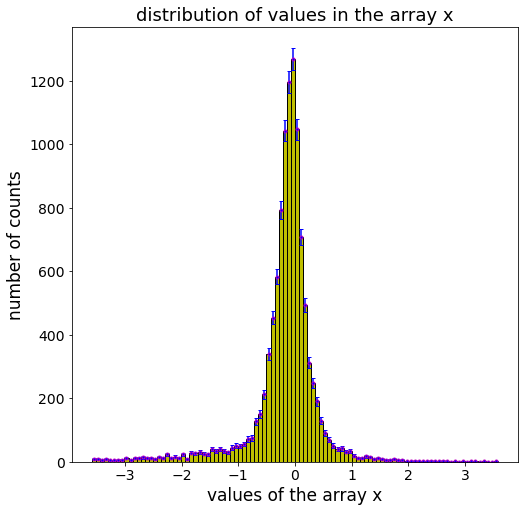

In [31]:
#plotting the histogram of the filtered dataset

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #generating the subplot with a figure object and an axes object

bin_values, edges, _ = ax.hist(res, bins=100,label='x', color='y', edgecolor='black') #generating a histogram and defining the bins values(the number of elements in a bin) and the bins edges

ax.set_xlabel('values of the array x', fontsize=17) #setting the label of the axis
ax.set_ylabel('number of counts', fontsize=17)
ax.set_title('distribution of values in the array x', fontsize=18) #setting the title

bin_centers= 0.5 * (edges[:-1] + edges[1:]) #defining the array of the centers of the bins on the x axis
bin_w=(edges[:-1] - edges[1:])

ax.errorbar(bin_centers, bin_values, yerr=((bin_values)**(1/2)), fmt='b.', markeredgecolor='m',  capsize=2) #adding the errorbars

ax.tick_params(axis='x', labelsize=14) #setting the dimension of axis ticks
ax.tick_params(axis='y', labelsize=14)


The filtered data are distributed as a gaussian. It is possible to eliminate the least meaningful data to better fit the gaussian. This kind of points are the once with the lowest counts, thus the tails of the gaussian. 

In [32]:
def f(x, m, s, A): #defining the fitting function
    return A * np.exp((-1/2)*(((x-m)/s)**2))

In [33]:
data_copy=data[abs(data['residuals']) < 2] #filtering the data to eliminate the tails of the gaussian

res=np.asarray(data_copy['residuals']) #generating an array with the fildered dataset

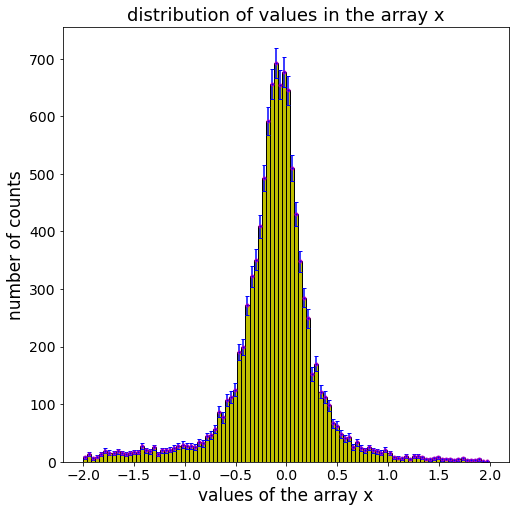

In [34]:
#plotting the final histogram

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #generating the subplot with a figure object and an axes object

bin_values, edges, _ = ax.hist(res, bins=100,label='x', color='y', edgecolor='black') #generating a histogram and defining the bins values(the number of elements in a bin) and the bins edges

ax.set_xlabel('values of the array x', fontsize=17) #setting the label of the axis
ax.set_ylabel('number of counts', fontsize=17)
ax.set_title('distribution of values in the array x', fontsize=18) #setting the title

bin_centers= 0.5 * (edges[:-1] + edges[1:]) #defining the array of the centers of the bins on the x axis
bin_w=(edges[:-1] - edges[1:])

ax.errorbar(bin_centers, bin_values, yerr=((bin_values)**(1/2)), fmt='b.', markeredgecolor='m',  capsize=2) #adding the errorbars

ax.tick_params(axis='x', labelsize=14) #setting the dimension of axis ticks
ax.tick_params(axis='y', labelsize=14)

In [35]:
popt, pcov = optimize.curve_fit(f, bin_centers, bin_values, p0=[-0.04,1,600], full_output=False) #fitting the final histogram

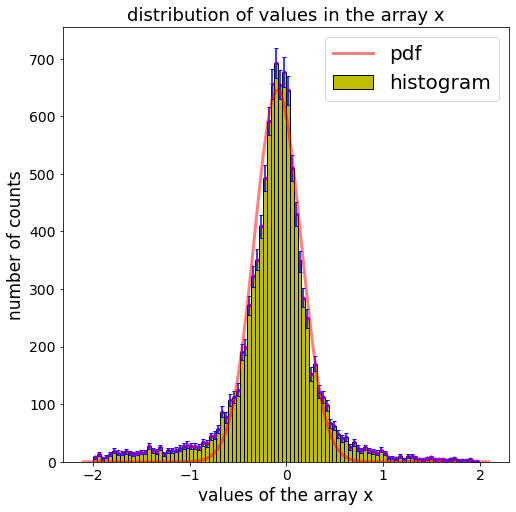

In [36]:
#plotting the fitted histogram

fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #generating the subplot with a figure object and an axes object

bin_values, edges, _ = ax.hist(res, bins=100,label='x', color='y', edgecolor='black') #generating a histogram and defining the bins values(the number of elements in a bin) and the bins edges

ax.set_xlabel('values of the array x', fontsize=17) #setting the label of the axis
ax.set_ylabel('number of counts', fontsize=17)
ax.set_title('distribution of values in the array x', fontsize=18) #setting the title

bin_centers= 0.5 * (edges[:-1] + edges[1:]) #defining the array of the centers of the bins on the x axis
bin_w=(edges[:-1] - edges[1:])

ax.errorbar(bin_centers, bin_values, yerr=((bin_values)**(1/2)), fmt='b.', markeredgecolor='m',  capsize=2) #adding the errorbars

ax.tick_params(axis='x', labelsize=14) #setting the dimension of axis ticks
ax.tick_params(axis='y', labelsize=14)

pdf= f(bin_centers,popt[0] , popt[1], popt[2])

z=np.linspace(res.min()-0.1,res.max()+0.1, 100)

ax.plot(z, pdf,color='r',linewidth=3,alpha=0.5) 
ax.legend(['pdf','histogram'],loc='best',prop={"size":20}) #setting the legend

In [37]:
#printing the histogram
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print('\n')
print("The mean of the fitting gaussian is : %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("The square root of the variance of the fitting gaussian is : %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("The costant A in front of the fitting gaussian is : %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

parameters:
 [-8.54623456e-02  2.24689010e-01  6.46927809e+02]
covariance matrix:
 [[ 1.77235061e-05  7.04473162e-14 -3.24183624e-11]
 [ 7.04473162e-14  1.77235065e-05 -2.55152473e-02]
 [-3.24183624e-11 -2.55152473e-02  1.10197356e+02]]


The mean of the fitting gaussian is : -0.09 +- 0.00
The square root of the variance of the fitting gaussian is : 0.22 +- 0.00
The costant A in front of the fitting gaussian is : 646.93 +- 10.50


In [38]:
from scipy import stats

sigma_y = np.sqrt(bin_values) 

ndof = len(bin_centers) - 3 #number of datas-the number of the parameters of the fitting function
print("n degrees of freedom =", ndof)
# calculating the chi^2
chi2 = np.sum(((bin_values - pdf)**2) / sigma_y**2)
print("chi2 =", chi2)
# calculating the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)

n degrees of freedom = 97
chi2 = 1343.346357015861
p-value = 0.0


The p-value is smaller than the commonly used confidence level $\alpha=5 \%$ because of the large value of the chi_squared. Thus its values is not satisfactory. 

# exercize 4

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [39]:
file=np.loadtxt('munich_temperatures_average_with_bad_data.txt') #loading the file
print(type(file))
print(file)

<class 'numpy.ndarray'>
[[ 1.99500274e+03  9.44444000e-01]
 [ 1.99500548e+03 -1.61111000e+00]
 [ 1.99500821e+03 -3.55556000e+00]
 ...
 [ 2.01327926e+03  1.05556000e+01]
 [ 2.01328200e+03  8.94444000e+00]
 [ 2.01328474e+03  1.11667000e+01]]


In [40]:
t=file[:,0] 
y=file[:,1]


As for the previous exercize it is possible to hypothesize that a good fitting function is one based on sine or cosine function.

In [41]:
def f(x, a, b, c):
    return a * np.cos(2*math.pi*x+b)+c #cosine function with amplitude A, shift on x axis b and shift on y axis c

#fitting the data
popt, pcov = optimize.curve_fit(f, t, y, p0=[10, 0, 10], full_output=False) #finora meglio: 20,0.5,17(cos)
print("parameters:\n", popt) #printing the parameters
print('\n')
print("covariance matrix:\n", pcov)#printing the covariance matrix
print('\n')




parameters:
 [-9.67127679 -0.22365327  9.05256209]


covariance matrix:
 [[ 3.10356273e-02 -3.05713533e-05 -3.52680259e-04]
 [-3.05713533e-05  3.34266601e-04 -2.60833813e-05]
 [-3.52680259e-04 -2.60833813e-05  1.55751792e-02]]




The function fitted is:
$$
A\cdot cos(2\pi x+b)+c
$$

In [42]:
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0]))) #printing the parameters with the associated errors
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

A = -9.67 +- 0.18
b = -0.22 +- 0.02
c = 9.05 +- 0.12


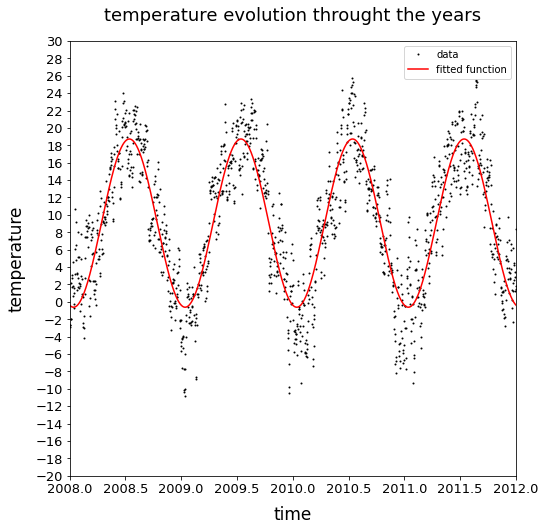

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the points with the function found

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('time', fontsize=17, labelpad=10)
ax.set_ylabel('temperature', fontsize=17, labelpad=10)
ax.set_title('temperature evolution throught the years', fontsize=18, pad=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(2)) 


ax.plot(t, y, 'o', color='black', markersize=1, label='data') 
ax.plot(t, f(t, popt[0], popt[1], popt[2]), color='r', label='fitted function') 
ax.set_ylim(-20,30)
ax.set_xlim(2008,2012)


plt.legend(loc='best')

The parameter $b$ is the offset on the axis x. It permits to move the function left or  right. In this case it is a temporal offset that permits to fit the data better. Since the unit of the temporal array is one year and the absolute value of $b$ is $0.22$ (not considering the error) the temporal offset corresponds to $0.22 \cdot 1 year$ that is almost to month and an half.

In [44]:
print(f'the overall average in Munich is: {np.mean(y)}')

the overall average in Munich is: 8.941907038598593


In [45]:
for i in range(1995,2014):
    
    x=[]
    
    for j in range(len(t)):
        if t[j]>=i and t[j]<=i+1:
            
            x.append(t[j])

    x=np.asarray(x)

    print(f'the maximum temperature predicted in year {i} is:{max(f(x, popt[0], popt[1], popt[2]))}')
    print(f'the minimum temperature predicted in year {i} is:{min(f(x, popt[0], popt[1], popt[2]))}')
    print('\n')
    

the maximum temperature predicted in year 1995 is:18.72363852239353
the minimum temperature predicted in year 1995 is:-0.6187146939908956


the maximum temperature predicted in year 1996 is:18.7236385223936
the minimum temperature predicted in year 1996 is:-0.6187146939908956


the maximum temperature predicted in year 1997 is:18.723638522393557
the minimum temperature predicted in year 1997 is:-0.6187146939908956


the maximum temperature predicted in year 1998 is:18.72363852239352
the minimum temperature predicted in year 1998 is:-0.6187146939908956


the maximum temperature predicted in year 1999 is:18.723638522393593
the minimum temperature predicted in year 1999 is:-0.6187146939908956


the maximum temperature predicted in year 2000 is:18.72363852239355
the minimum temperature predicted in year 2000 is:-0.6187146939908956


the maximum temperature predicted in year 2001 is:18.723638522393507
the minimum temperature predicted in year 2001 is:-0.6187146939908956


the maximum temper

Since the function is periodic the values are very similar.

the maximum temperature in the year 2013 is not near the other maximum because the dataset stops at the beggining of the 2013. In order to estimate it I am going to create an array of 1000 values between 2013 and 2014 and seek for the maxximum temperature.

In [46]:
fake_t=np.arange(2013,2014,10**(-3))

print(f'the maximum temperature predicted for year 2013 is:{max(f(fake_t, popt[0], popt[1], popt[2]))}')

the maximum temperature predicted for year 2013 is:18.72380765276766


In [47]:
def g(x, a, b, c, d):
    return a * np.cos(2*math.pi*b*x+c)+d #cosine function with amplitude A, frequency factor b, shift on x axis c and shift on y axis d


#fitting the data 
popt2, pcov2 = optimize.curve_fit(g, t, y, p0=[10, 1, 0 , 10], full_output=False) #finora meglio: 20,0.5,17(cos)
print("parameters:\n", popt) #printing the parameters
print('\n')
print("covariance matrix:\n", pcov) #printing the covariance matrix
print('\n')


parameters:
 [-9.67127679 -0.22365327  9.05256209]


covariance matrix:
 [[ 3.10356273e-02 -3.05713533e-05 -3.52680259e-04]
 [-3.05713533e-05  3.34266601e-04 -2.60833813e-05]
 [-3.52680259e-04 -2.60833813e-05  1.55751792e-02]]




The function fitted is:
$$
A\cdot cos(2b\pi x+c)+d
$$

In [48]:
print("A = %.2f +- %.2f" % (popt2[0], np.sqrt(pcov2[0,0]))) #printing the parameters
print("b = %.2f +- %.2f" % (popt2[1], np.sqrt(pcov2[1,1])))
print("c = %.2f +- %.2f" % (popt2[2], np.sqrt(pcov2[2,2])))
print("d = %.2f +- %.2f" % (popt2[3], np.sqrt(pcov2[3,3])))

A = -9.67 +- 0.18
b = 1.00 +- 0.00
c = 3.05 +- 6.95
d = 9.05 +- 0.12


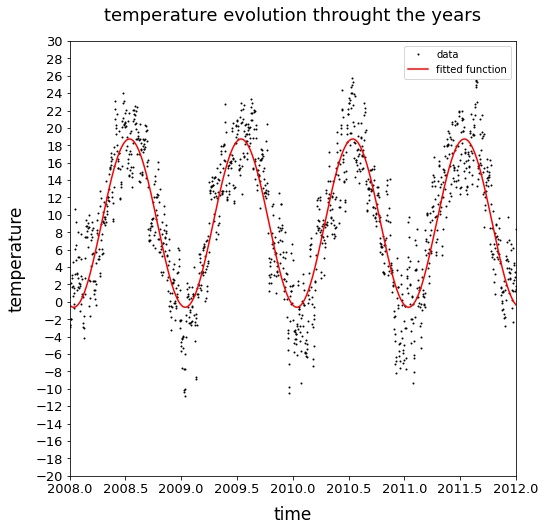

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) #plotting the points with the function found

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_xlabel('time', fontsize=17, labelpad=10)
ax.set_ylabel('temperature', fontsize=17, labelpad=10)
ax.set_title('temperature evolution throught the years', fontsize=18, pad=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(2)) 


ax.plot(t, y, 'o', color='black', markersize=1, label='data') 
ax.plot(t, g(t, popt2[0], popt2[1], popt2[2], popt2[3]), color='r', label='fitted function') 
ax.set_ylim(-20,30)
ax.set_xlim(2008,2012)

plt.legend(loc='best')



In [50]:
#estimating the RSS fucntion of the two fitting function
rss_1=np.sum((y-f(t, popt[0], popt[1], popt[2]))**2)
print(f'the RSS of the first function f(x): {rss_1}')
rss_2=np.sum((y-g(t, popt2[0], popt2[1], popt2[2], popt2[3]))**2)
print(f'the RSS of the second function g(x): {rss_2}')

the RSS of the first function f(x): 694209.8326248896
the RSS of the second function g(x): 694186.2523461056


In [51]:
#using the fisher F-test to determine if the additional of the function g(x) parameter is necessary
ndof_1 = 3 - 1
ndof_2 = 4 - 1
N=len(t)

def Ftest(rss_1, rss_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((rss_1 - rss_2)/(ndof_2 - ndof_1)) / (rss_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

In [52]:
f_vs_g = Ftest(rss_1, rss_2, ndof_1, ndof_2, N, verbose=True)

CL: 0.634 , additional parameter necessary: NO
